In [2]:
import pandas as pd

In [3]:
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/refs/heads/main/Aula_0/ml-latest-small/ratings.csv') #Importanto um DF
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"] # Mudando o nome das colunas

In [5]:
notas.head() #Mostra os 5 primeiros


,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas["nota"].unique() #Mostra notas unicas

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas["nota"].value_counts() #Conta os valores das notas

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [8]:
notas["nota"].mean() #Media das notas

3.501556983616962

<Axes: ylabel='Frequency'>

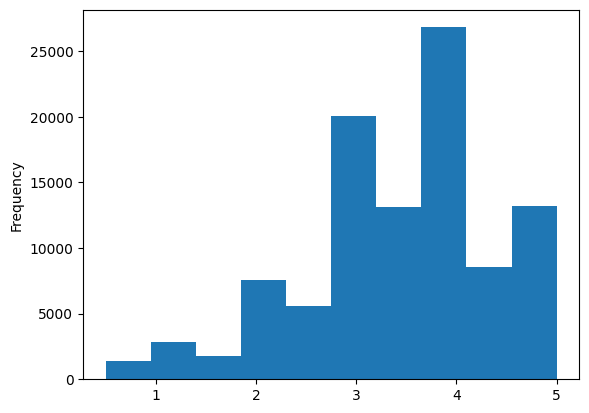

In [9]:
notas["nota"].plot(kind='hist') #Cria um histograma da coluna notas

In [10]:
notas["nota"].median() #Mediana das notas

3.5

In [11]:
mediana = notas["nota"].median()
media = notas["nota"].mean()
print (f"Mediana : {mediana}")
print (f"Media : {media}")

Mediana : 3.5
Media : 3.501556983616962


In [12]:
notas['nota'].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

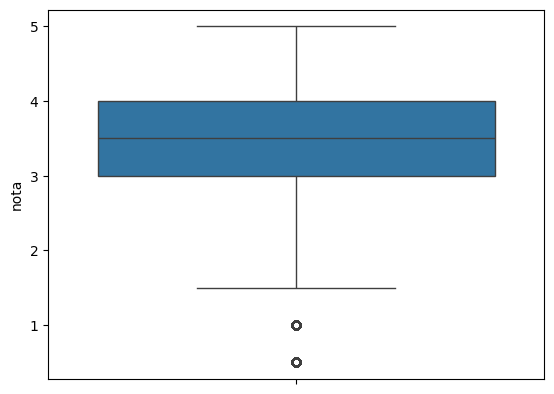

In [13]:
import seaborn as sns

sns.boxplot(notas['nota'])

#Explorando os filmes

In [14]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv") #Importando o DataFrame de filmes
filmes.columns = ["filmesID", "Titulo", "Genero"] #Mudando o nome das colunas
filmes

,filmesID,Titulo,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [15]:
notas.query("filmeID==1")["nota"].mean() #Calcula a media do filme com o ID 1

3.9209302325581397

In [16]:
media_por_filme = notas.groupby("filmeID")["nota"].mean() #Calcula a media de todos os filmes
media_por_filme.head()

,nota
filmeID,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

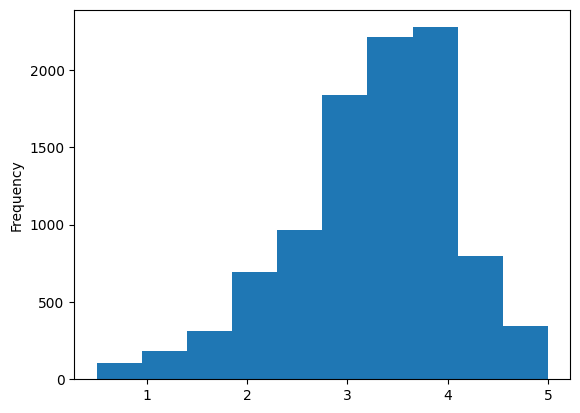

In [17]:
media_por_filme.plot(kind="hist")

Text(0.5, 1.0, 'Distribuição das médias dos filmes')

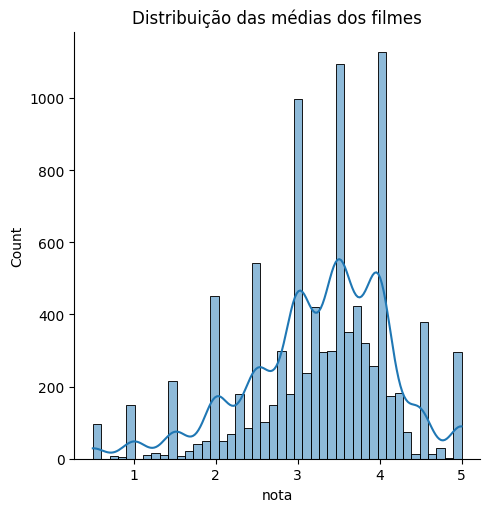

In [18]:
import matplotlib.pyplot as plt

sns.displot(media_por_filme, kde=True) #Mostra a DISTRIBUIÇÃO usando o displot
plt.title("Distribuição das médias dos filmes") #Adiciono um titulo ai histograma

#Outros filmes


In [19]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


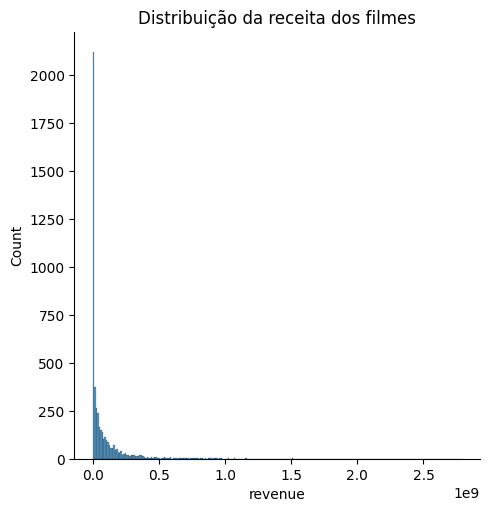

In [20]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

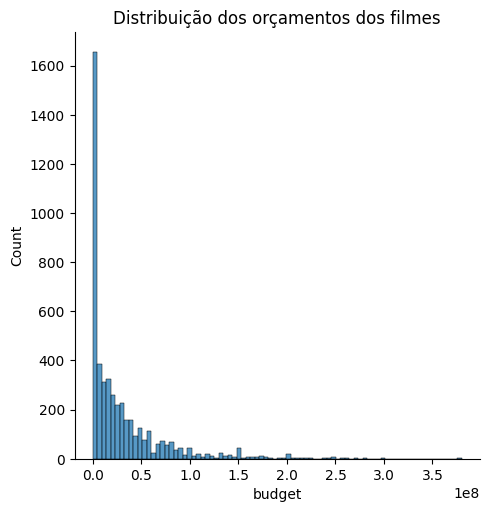

In [21]:
sns.displot(tmdb["budget"])
plt.title("Distribuição dos orçamentos dos filmes")
plt.show()

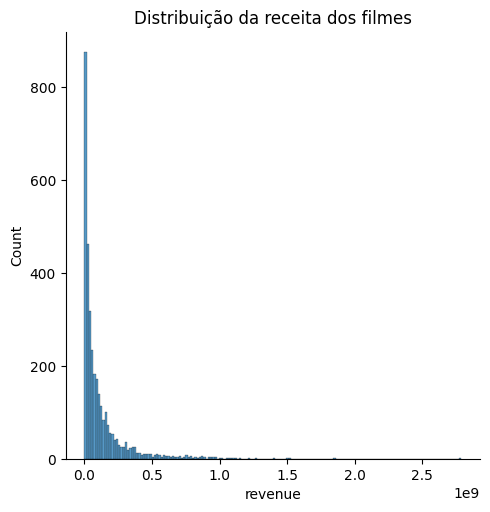

In [22]:
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

In [23]:
tmdb["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [24]:
tmdb["original_language"].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [25]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [26]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [27]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


<Axes: >

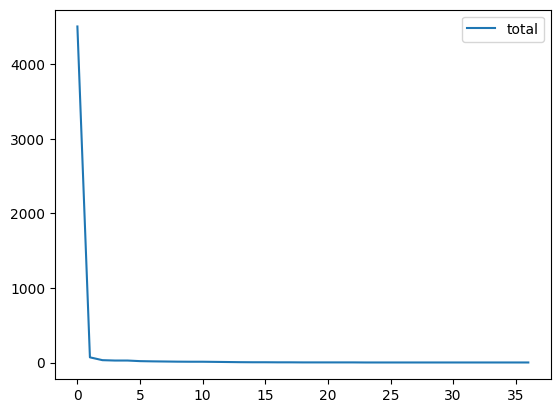

In [28]:
contagem_de_lingua.plot()

<Axes: xlabel='original_language', ylabel='total'>

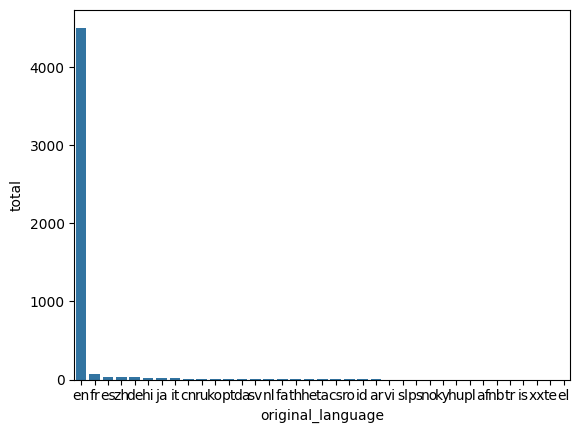

In [29]:
sns.barplot(data=contagem_de_lingua, x="original_language", y="total")


<Axes: xlabel='original_language', ylabel='count'>

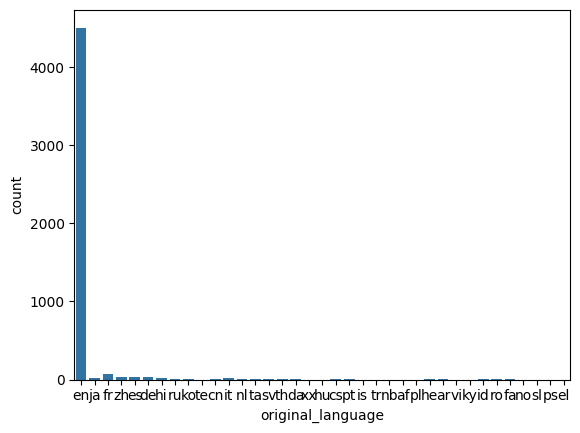

In [30]:
sns.countplot(data = tmdb, x="original_language")

<Axes: ylabel='total'>

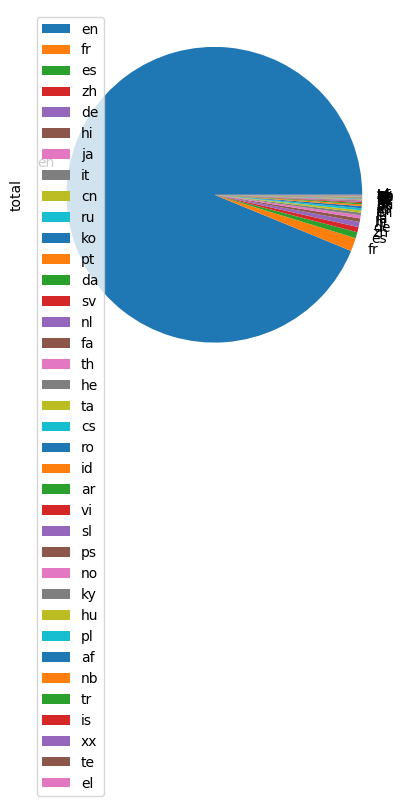

In [31]:
contagem_de_lingua.plot(kind="pie", y="total", labels=contagem_de_lingua["original_language"])

#Melhorando a visualização

In [32]:
total_por_lingua = tmdb["original_language"].value_counts() #revisar todos e adicionar comentario a todos
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"] #Usando o .loc para conseguir buscar um indice de dentro da tabela.
total_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_resto)

4803 4505 298


In [33]:
#Criei um DataFrame para visualizar os dados
dados = {
    "lingua" : ["ingles", "outros"],
    "total" : [total_de_ingles, total_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

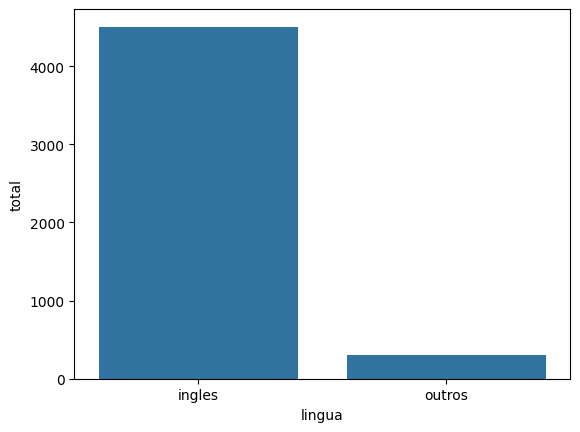

In [34]:
#Faço um grafico para poder visualizar os valores
sns.barplot(data=dados, x="lingua", y="total")

<Axes: ylabel='total'>

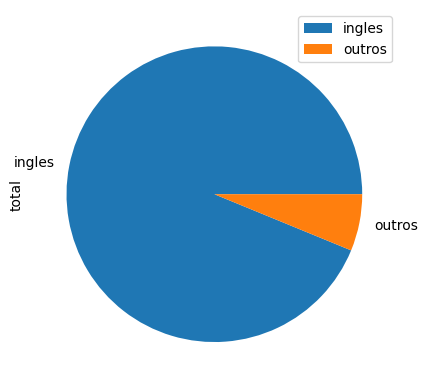

In [35]:
dados.plot(kind="pie", y="total", labels=dados["lingua"])

In [36]:
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_outros_filmes_por_lingua.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


<Axes: xlabel='original_language', ylabel='count'>

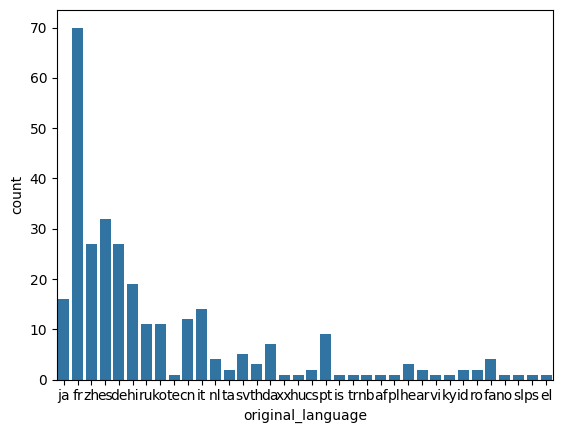

In [37]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              x="original_language")

<Axes: xlabel='original_language', ylabel='count'>

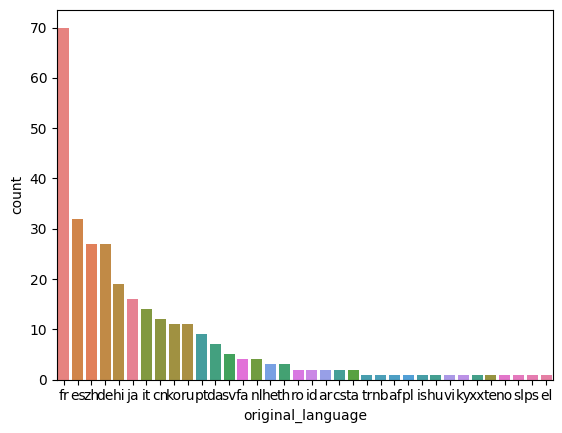

In [38]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              hue="original_language",
              x="original_language")

In [39]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

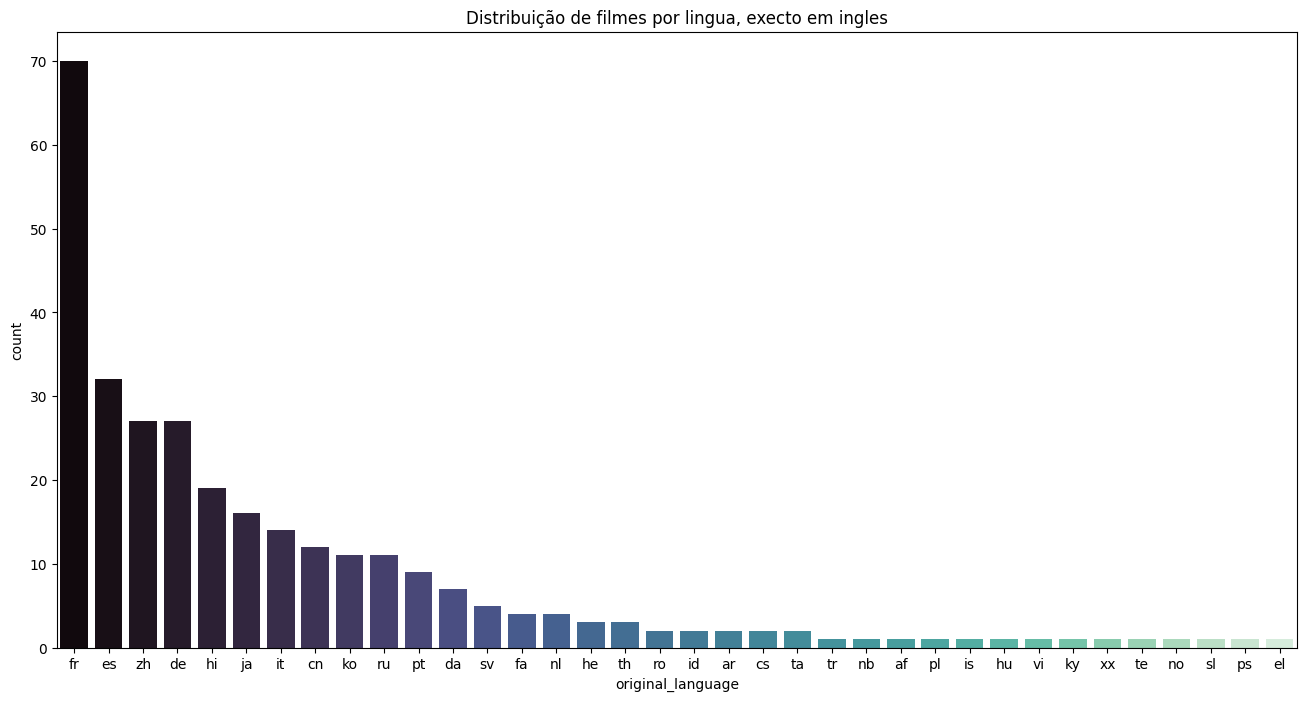

In [40]:
plt.figure(figsize=(16, 8))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              x="original_language")
plt.title("Distribuição de filmes por lingua, execto em ingles")
plt.show()

#Comparar duas distribuiçoes visualmente ou atraves de medidas


In [41]:
filmes.head(2)

,filmesID,Titulo,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [43]:
# prompt: extraia as notas dos dois filmes em variaveis distintas
notas_do_toy_story = notas.query("filmeID==1")["nota"]
notas_do_jumanji = notas.query("filmeID==2")["nota"]

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

print(media_do_toy_story, media_do_jumanji)

3.9209302325581397 3.4318181818181817


In [44]:
# prompt: mesmo mas com a mediana

mediana_do_toy_story = notas_do_toy_story.median()
mediana_do_jumanji = notas_do_jumanji.median()

print(mediana_do_toy_story, mediana_do_jumanji)


4.0 3.5


In [45]:
import numpy as np

filme1 = [2.5] * 10 + [3.5] * 10
filme2 = [5] * 10 + [1] * 10



In [46]:

media_filme1 = np.mean(filme1)
mediana_filme1 = np.median(filme1)

media_filme2 = np.mean(filme2)
mediana_filme2 = np.median(filme2)

print("Filme 1:")
print("Média:", media_filme1)
print("Mediana:", mediana_filme1)

print("\nFilme 2:")
print("Média:", media_filme2)
print("Mediana:", mediana_filme2)


Filme 1:
Média: 3.0
Mediana: 3.0

Filme 2:
Média: 3.0
Mediana: 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

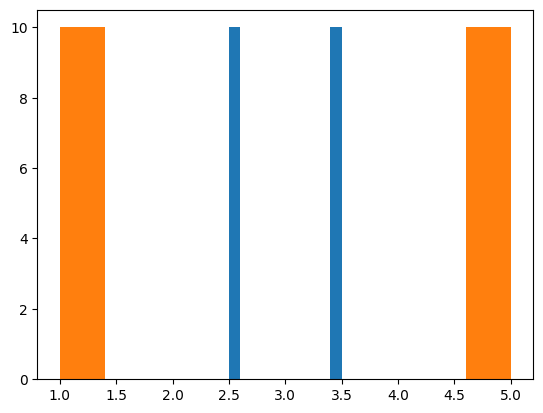

In [47]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe437542a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe437543b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe437542110>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe437558f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe437559790>,
 'means': []}

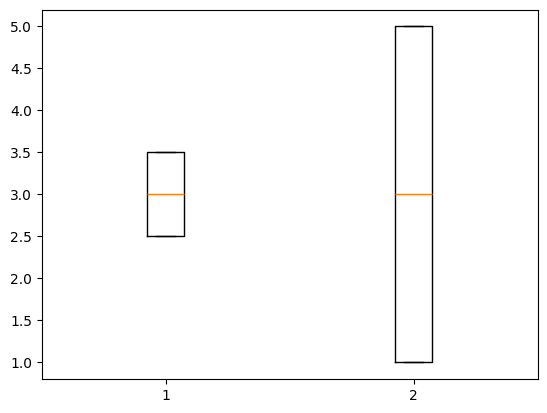

In [49]:
plt.boxplot([filme1, filme2])

In [50]:
filme0 = [3.0] * 20 # espalha 0
np.mean(filme0)

3.0

In [52]:
np.std(filme0), np.std(filme1), np.std(filme2)

(0.0, 0.5, 2.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4375bead0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4375bfe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe4375be2d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe4375cd2d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4375cdad0>,
 'means': []}

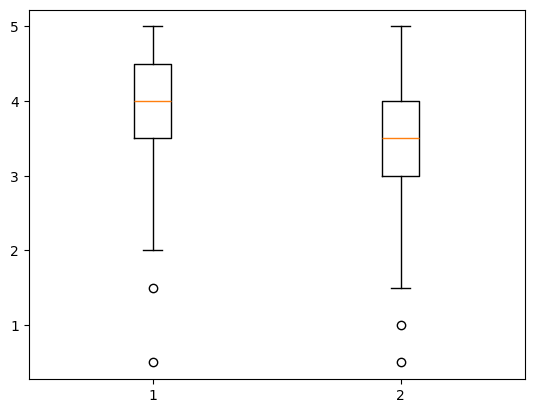

In [53]:

plt.boxplot([notas_do_toy_story, notas_do_jumanji])


<Axes: xlabel='filmeID', ylabel='nota'>

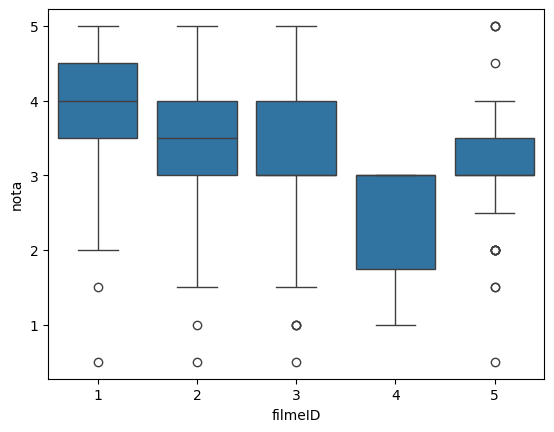

In [55]:
sns.boxplot(data=notas.query("filmeID in [1,2,3,4,5]"),
            x="filmeID",
            y="nota")

<ipython-input-57-645fbd855205>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("filmeID in [1,2,3,4,5]"),


<Axes: xlabel='filmeID', ylabel='nota'>

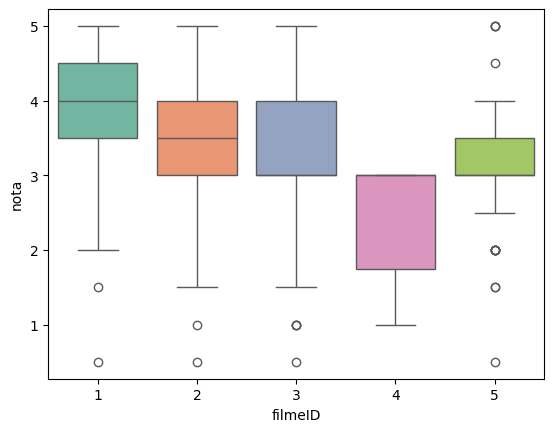

In [57]:
# prompt: mesmo grafico mas colorido

sns.boxplot(data=notas.query("filmeID in [1,2,3,4,5]"),
            x="filmeID",
            y="nota",
            palette="Set2")


In [59]:
notas.groupby("filmeID").count()

,usuarioID,nota,momento
filmeID,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [61]:
notas["filmeID"].value_counts().tail()

,count
filmeID,
86279,1
86922,1
5962,1
87660,1
163981,1


In [63]:
notas.groupby("filmeID").count().query("nota == 1")

,usuarioID,nota,momento
filmeID,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
